In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import scipy

from scipy.special import comb
from scipy.stats import spearmanr

- Linear regression of audio features on maximum streams
- Aggregate rank for each song, do regression predicting maximum streams

In [54]:
df= pd.read_csv('TopCharts_complete.csv')

In [55]:
df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,"1,180,074",0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,"1,064,351",0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,"1,010,492",0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,"874,289",0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


In [56]:
#couldn't retrieve audio features for these songs
df.loc[df.uri.isna(), :] 

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
42,43,2017-01-01,Major Lazer,Cold Water (feat. Justin Bieber & MØ),"342,437",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,49,2017-01-01,Starley,Call On Me - Ryan Riback Extended Remix,"313,819",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,52,2017-01-01,Alessia Cara,"How Far I'll Go - From ""Moana""","305,401",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,174,2017-01-01,Major Lazer,Light It Up (feat. Nyla & Fuse ODG) - Remix,"155,772",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,179,2017-01-01,BobMcFerrin,Don't Worry Be Happy,"151,217",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193,2017-01-01,The Rolling Stones,(I Can't Get No) Satisfaction - Mono Version /...,"144,843",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,33,2017-01-02,Alessia Cara,"How Far I'll Go - From ""Moana""","339,562",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,35,2017-01-02,Starley,Call On Me - Ryan Riback Extended Remix,"336,502",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,39,2017-01-02,Major Lazer,Cold Water (feat. Justin Bieber & MØ),"312,401",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,153,2017-01-02,Auli'i Cravalho,How Far I'll Go,"145,596",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#drop songs with missing features from dataset
df = df.dropna(subset = ["uri"])
df.isna().any()

rank                False
date                False
artist              False
title               False
streams             False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
uri                 False
duration_ms         False
time_signature      False
dtype: bool

In [58]:
#song audio features don't change from day to day, only need one instance of each song; drop duplicates
unique_df = df.drop_duplicates(subset = ['artist', 'title']).reset_index(drop = True)

In [59]:
unique_df

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,0.2440,0.06100,0.000000,0.1230,0.1750,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,"1,180,074",0.928,0.481,9.0,-9.350,0.0,0.2870,0.10500,0.000000,0.1760,0.6130,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,"1,064,351",0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.4860,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,"1,010,492",0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,"874,289",0.794,0.632,0.0,-6.163,1.0,0.0649,0.14200,0.000000,0.1280,0.3550,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
5,6,2017-01-01,DRAM,Broccoli (feat. Lil Yachty),"763,259",0.886,0.525,8.0,-7.390,1.0,0.1320,0.23600,0.000000,0.0570,0.7080,145.990,spotify:track:0O5fLzF9V8FCe0QXAi04ov,225205.0,4.0
6,7,2017-01-01,Drake,One Dance,"753,150",0.792,0.625,1.0,-5.609,1.0,0.0536,0.00776,0.001880,0.3290,0.3700,103.967,spotify:track:1zi7xx7UVEFkmKfv06H8x0,173987.0,4.0
7,8,2017-01-01,Aminé,Caroline,"714,839",0.941,0.335,5.0,-10.179,0.0,0.5050,0.17000,0.000000,0.2620,0.7070,120.041,spotify:track:5hTpBe8h35rJ67eAWHQsJx,209640.0,4.0
8,9,2017-01-01,DJ Snake,Let Me Love You,"690,483",0.649,0.716,8.0,-5.371,1.0,0.0349,0.08630,0.000026,0.1350,0.1630,99.988,spotify:track:0lYBSQXN6rCTvUZvg9S0lU,205947.0,4.0
9,10,2017-01-01,Big Sean,Bounce Back,"682,688",0.780,0.575,1.0,-5.628,0.0,0.1390,0.10600,0.000000,0.1290,0.2730,81.502,spotify:track:0SGkqnVQo9KPytSri1H6cF,222360.0,4.0


In [60]:
#convert streams from string to int
df['streams'] = df['streams'].map(lambda x: int("".join(x.split(","))))
df

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.06100,0.000000,0.1230,0.1750,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.10500,0.000000,0.1760,0.6130,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.4860,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.14200,0.000000,0.1280,0.3550,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
5,6,2017-01-01,DRAM,Broccoli (feat. Lil Yachty),763259,0.886,0.525,8.0,-7.390,1.0,0.1320,0.23600,0.000000,0.0570,0.7080,145.990,spotify:track:0O5fLzF9V8FCe0QXAi04ov,225205.0,4.0
6,7,2017-01-01,Drake,One Dance,753150,0.792,0.625,1.0,-5.609,1.0,0.0536,0.00776,0.001880,0.3290,0.3700,103.967,spotify:track:1zi7xx7UVEFkmKfv06H8x0,173987.0,4.0
7,8,2017-01-01,Aminé,Caroline,714839,0.941,0.335,5.0,-10.179,0.0,0.5050,0.17000,0.000000,0.2620,0.7070,120.041,spotify:track:5hTpBe8h35rJ67eAWHQsJx,209640.0,4.0
8,9,2017-01-01,DJ Snake,Let Me Love You,690483,0.649,0.716,8.0,-5.371,1.0,0.0349,0.08630,0.000026,0.1350,0.1630,99.988,spotify:track:0lYBSQXN6rCTvUZvg9S0lU,205947.0,4.0
9,10,2017-01-01,Big Sean,Bounce Back,682688,0.780,0.575,1.0,-5.628,0.0,0.1390,0.10600,0.000000,0.1290,0.2730,81.502,spotify:track:0SGkqnVQo9KPytSri1H6cF,222360.0,4.0


In [61]:
#iterate through each row in unique_df, replace current streams value with max streams 
for i in range(len(unique_df)):
    uri = unique_df.loc[i, 'uri']
    subset = df.loc[df.uri == uri, :]
    max_streams = subset.streams.max()
    unique_df.loc[i, 'streams'] = max_streams

In [62]:
unique_df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1823391,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1428332,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1134858,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


In [63]:
#change column name to max_streams and save as csv
max_streams_df = unique_df.rename(columns = {"streams":"max_streams"})
max_streams_df.to_csv("TopCharts_maxstreams.csv", index = False)

In [64]:
max_streams_df

,rank,date,artist,title,max_streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1823391,0.927,0.665,11.0,-5.313,1.0,0.2440,0.06100,0.000000,0.1230,0.1750,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1428332,0.928,0.481,9.0,-9.350,0.0,0.2870,0.10500,0.000000,0.1760,0.6130,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1134858,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.4860,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.14200,0.000000,0.1280,0.3550,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
5,6,2017-01-01,DRAM,Broccoli (feat. Lil Yachty),763259,0.886,0.525,8.0,-7.390,1.0,0.1320,0.23600,0.000000,0.0570,0.7080,145.990,spotify:track:0O5fLzF9V8FCe0QXAi04ov,225205.0,4.0
6,7,2017-01-01,Drake,One Dance,753150,0.792,0.625,1.0,-5.609,1.0,0.0536,0.00776,0.001880,0.3290,0.3700,103.967,spotify:track:1zi7xx7UVEFkmKfv06H8x0,173987.0,4.0
7,8,2017-01-01,Aminé,Caroline,835200,0.941,0.335,5.0,-10.179,0.0,0.5050,0.17000,0.000000,0.2620,0.7070,120.041,spotify:track:5hTpBe8h35rJ67eAWHQsJx,209640.0,4.0
8,9,2017-01-01,DJ Snake,Let Me Love You,690483,0.649,0.716,8.0,-5.371,1.0,0.0349,0.08630,0.000026,0.1350,0.1630,99.988,spotify:track:0lYBSQXN6rCTvUZvg9S0lU,205947.0,4.0
9,10,2017-01-01,Big Sean,Bounce Back,1390055,0.780,0.575,1.0,-5.628,0.0,0.1390,0.10600,0.000000,0.1290,0.2730,81.502,spotify:track:0SGkqnVQo9KPytSri1H6cF,222360.0,4.0


## Regression of Max Streams from Audio Features

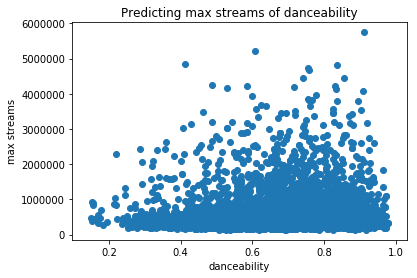

Intercept: 404374.0614172924
R2: 0.0054398281377996405
Correlation: 0.0738


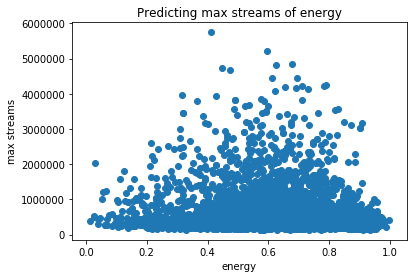

Intercept: 739393.1223903715
R2: 0.004923695641065651
Correlation: -0.0702


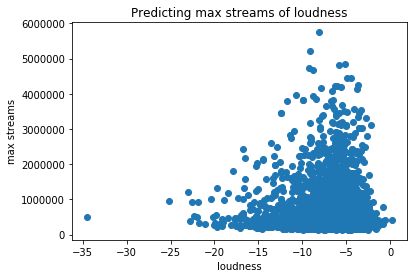

Intercept: 559665.0025373445
R2: 0.0005778241706582143
Correlation: -0.0240


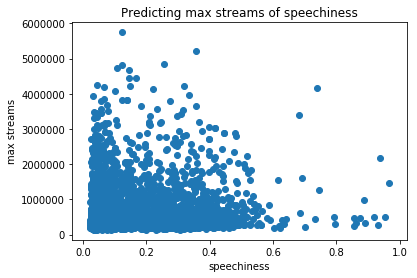

Intercept: 553814.2169448063
R2: 0.0038187044781535784
Correlation: 0.0618


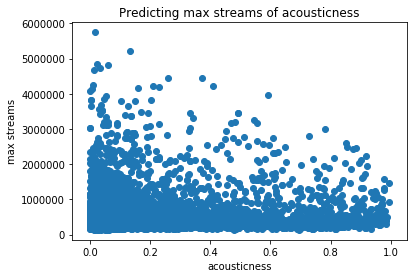

Intercept: 590116.8560605384
R2: 6.701531818531503e-05
Correlation: 0.0082


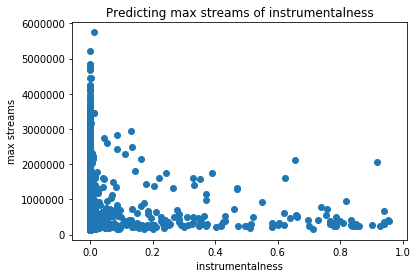

Intercept: 596147.6481742339
R2: 0.0003381804644857489
Correlation: -0.0184


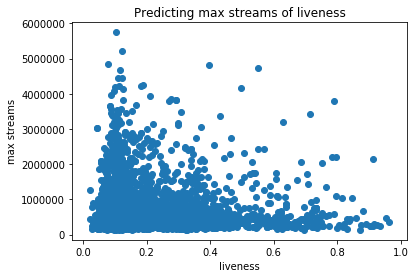

Intercept: 577261.9533619191
R2: 0.0005089812679814898
Correlation: 0.0226


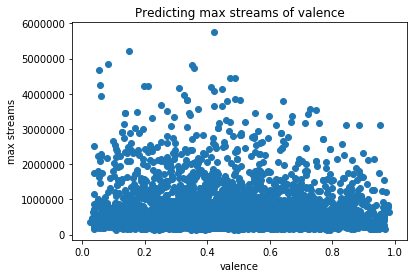

Intercept: 638614.4518334746
R2: 0.0013522830702896727
Correlation: -0.0368


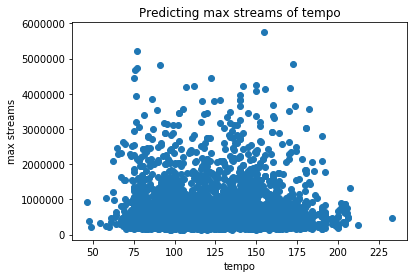

Intercept: 567829.6723213797
R2: 0.00012382379312037006
Correlation: 0.0111


In [105]:
#cluster only on continuous features
cluster_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']


for c in cluster_cols:
    #create scatterplot for each audio feature to max streams
    plt.scatter(max_streams_df[c], max_streams_df['max_streams'])
    plt.title("Predicting max streams of " + c )
    plt.xlabel(c)
    plt.ylabel("max streams")
    plt.show()
    #model regression predicting max streams to audio feature
    model = LinearRegression().fit(max_streams_df[[c]], max_streams_df['max_streams'])
    #print intercept, r^2, and correlation
    print("Intercept:", model.intercept_)
    print("R2:", model.score(max_streams_df[[c]], max_streams_df["max_streams"]))
    corrcoef = np.corrcoef(max_streams_df[c], max_streams_df["max_streams"])[0][1]
    print('Correlation: {:.4f}'.format(corrcoef))

## Multiple Regression with all the Audio Features

In [106]:
#Multiple linear regression, multiple predictors 

model = LinearRegression().fit(max_streams_df[cluster_cols], max_streams_df['max_streams'])
#print intercept, r^2, and correlation
print("Intercept:", model.intercept_)
print("R2 Coefficent:", model.score(max_streams_df[cluster_cols], max_streams_df["max_streams"]))

Intercept: 643866.7712480299
R2 Coefficent: 0.0163244357968112


## Analysis 

- Overall when looking at all the regressions for predicting max streams from audio features, we can say that they are not good predictors in determining maximum number of streams a song will get.
- The r2 and correlations of all of the audio features are too low for their to be a reason or prediction of max streams from audio features 